In [2]:
# Visualise all ratings in MovieLens Dataset
# all ratings of ten most popular movies which recieved the most ratings
# all ratings of ten best movies with highest average ratings
# all ratings of movies from three genres of your choice (three separate visualizations)
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def load_data(filename):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.
    
    Inputs:
        filename: given as a string.
        
    Outputs:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, dtype = np.str , delimiter='\t')

In [4]:
data = load_data("/Users/rohanmirchandani/Desktop/data/movies.txt")
titles = data[:,0:2]
genres = np.delete(data, 1, axis = 1)


ratings = load_data("/Users/rohanmirchandani/Desktop/data/data.txt")
ratings = ratings.astype(int)
print(ratings)

[[ 196  242    3]
 [ 186  302    3]
 [  22  377    1]
 ...
 [ 276 1090    1]
 [  13  225    2]
 [  12  203    3]]


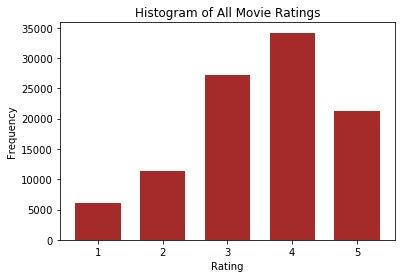

In [5]:
# Visualise all ratings in MovieLens Dataset
# create a histogram of all of the ratings showing how many of each rating was given
# report mean and standard deviation

plt.hist(ratings[:,2], bins = [.5, 1.5, 2.5, 3.5, 4.5, 5.5], rwidth = .7, color = 'brown')
plt.title("Histogram of All Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

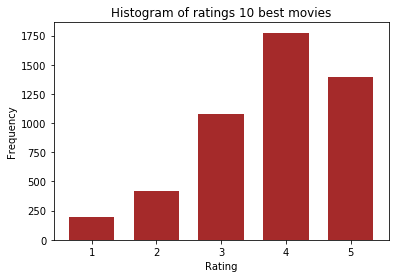

In [8]:
# all ratings of ten most popular movies which recieved the most ratings
x = np.transpose(ratings[:,1])
counts = np.array(np.unique(x, return_counts = True)).T
#print(counts)
counts = counts[counts[:,1].argsort()]

#print(counts)
# popular = np.array([
# [121, 429],
# [300, 431],
# [  1, 452],
# [288, 478],
# [286, 481],
# [294, 485],
# [181, 507],
# [100, 508],
# [258, 509],
# [ 50, 583]
# ])

popular = counts[-10:,:]
#print(popular)


best_movies = []

for i in range(len(popular)):
    movie_id = popular[i][0]
    for j in range(len(ratings)):
        if ratings[j][1] == movie_id:
            #append the rating
            best_movies.append(ratings[j][2])



#print(best_movies)

plt.hist(best_movies, bins = [.5, 1.5, 2.5, 3.5, 4.5, 5.5], rwidth = .7, color = 'brown')
plt.title("Histogram of ratings 10 best (most rated) movies")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


In [15]:
popular_titles = []
popular_ratings = popular[:,1]
for i in range(10):
    popular_titles.append(titles[popular[i][0] - 1][1])
    
plt.bar(popular[:,0].astype(int).astype(str), popular[:,1], width = .6, color = 'red')
plt.title("Most Popular Movies")
plt.xlabel("Movie Id")
plt.ylabel("Frequency")
plt.show()

TypeError: unsupported operand type(s) for -: 'numpy.str_' and 'float'

In [35]:
# all ratings of ten best movies with highest average ratings
av = {}
for i in range(len(ratings)):
    name = ratings[i][1]
    if name in av.keys():
        #if the movie already in dictionary
        av[name].append(ratings[i][2])
        
    else:
        av[name] = [ratings[i][2]]

for movie in av.keys():
    #print(str(movie), " ", str(np.mean(av[movie])))
    av[movie] = np.mean(av[movie])

av_movie_ratings = []
for movie_id in av.keys():
    av_movie_ratings.append([movie_id, av[movie_id]])
    
av_movie_ratings = np.asarray(av_movie_ratings)
#print(av_movie_ratings)
    
# for i in range(len(av_movie_ratings)):
#     print(av_movie_ratings[i])

av_ratings = av_movie_ratings[av_movie_ratings[:,1].argsort()]

print(av_ratings[-10:, :])

av_ratings = av_ratings.tolist()

for i in range(len(av_ratings)):
    id1 = int(av_ratings[i][0])
    #counts is the (id, # of ratings list)
    for j in range(len(counts)):
        id2 = int(counts[j][0])
        if id1 == id2:
            av_ratings[i].append(counts[j][1])
            break
            
av_ratings = (np.asarray(av_ratings))
#noa av_ratings has the counts for that movies as the third column

popular2 = []
j = 1681
while len(popular2) < 11:
    if av_ratings[j][2] >= 30:
        popular2.append([av_ratings[j][0], av_ratings[j][1]])
    j -= 1;

popular2 = np.asarray(popular2)
print(popular2)

best_av_movies = []            

plt.bar(popular2[:,0].astype(str), popular2[:,1], width = .6, color = 'red')
plt.title("10 Highest  Movies")
plt.xlabel("Movie Id")
plt.ylabel("Frequency")
plt.show()

[[1293.    5.]
 [1653.    5.]
 [1500.    5.]
 [ 814.    5.]
 [1122.    5.]
 [1467.    5.]
 [1599.    5.]
 [1201.    5.]
 [1536.    5.]
 [1189.    5.]]
[[408.           4.49107143]
 [318.           4.46644295]
 [169.           4.46610169]
 [483.           4.45679012]
 [114.           4.44776119]
 [ 64.           4.44522968]
 [603.           4.38755981]
 [ 12.           4.38576779]
 [ 50.           4.35849057]
 [178.           4.344     ]
 [513.           4.33333333]]


TypeError: unsupported operand type(s) for -: 'numpy.str_' and 'float'